# multiple regression

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('http://bit.ly/perch_csv_data') # 특성 행 자동으로 인식
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
import numpy as np

In [ ]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

In [ ]:
# 다항 특성 만들기 example
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures() # 변환기 클래스 
poly.fit([[2, 3]]) # 변환기는 타깃 데이터 없이 사용
print(poly.transform([[2, 3]])) # 1(bias), 2, 3, 2***2, 2*3, 3**2
                                # 훈련(fit)을 해야 변환(transform)이 가능

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias = False) # 절편 항 무시
poly.fit([[2, 3]]) 
print(poly.transform([[2, 3]])) 

[[2. 3. 4. 6. 9.]]


- 특성 공학(feature engineering): 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업

In [ ]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape) # 42개의 샘플과 9개의 특성

(42, 9)


In [ ]:
poly.get_feature_names_out() # 9개의 특성이 어떤 입력의 조합으로 만들어졌는지 확인

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
test_poly = poly.transform(test_input) # 테스트 세트 변환
                                       # 훈련 세트를 기준으로 테스트 세트 변환
                                       # 이 경우 별도의 통계 값을 구하지 않기 때문에 따로 변환해도 상관없음

In [ ]:
# 다중 회귀 훈련
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [ ]:
print(lr.score(train_poly, train_target))

0.9903183436982124


In [ ]:
print(lr.score(test_poly, test_target)) # 과소적합 문제 해소

0.9714559911594134


In [ ]:
# 더 많은 특성 만들기
poly = PolynomialFeatures(degree = 5, include_bias = False) # 5제곱까지 특성을 만들어보기
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [ ]:
print(train_poly.shape)

(42, 55)


In [ ]:
lr.fit(train_poly, train_target)

LinearRegression()

In [ ]:
print(lr.score(train_poly, train_target))

0.9999999999991097


In [ ]:
print(lr.score(test_poly, test_target)) # 훈련 세트에 과대적합되므로 테스트 세트에서는 형편없는 score
                                        # 샘플의 개수 < 특성의 개수

-144.40579242684848


- Linear regression 에서는 표준화를 하지 않아도 된다.

## Regularization
- Ridge regression
- Lasso regression

In [ ]:
# 규제를 위해서 표준화를 진행
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() 
ss.fit(train_poly) # 훈련 세트의 통계값을 사용
train_scaled = ss.transform(train_poly) 
test_scaled = ss.transform(test_poly) # 반드시 훈련 세트를 기준으로 변환

In [ ]:
# 릿지 회귀 : 가중치를 제곱한 값을 기준으로 규제 (L2 규제)
from sklearn.linear_model import Ridge

ridge = Ridge() # 매개변수 alpha로 규제의 강도를 조절, 기본값은 1
ridge.fit(train_scaled, train_target)

Ridge()

- Ridge 회귀 모델에서는 solver 매개변수로 최적의 모델을 찾기 위한 방법을 지정할 수 있음
- solver = 'sag' 는 확률적 평균 경사 하강법 알고리즘으로 특성과 새픔 수가 많을 때에 성능이 빠르고 좋음.
- solver = '

In [ ]:
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [ ]:
print(ridge.score(test_scaled, test_target))

0.9790693977615391


In [ ]:
# 적절한 규제 강도 찾기
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # alpha 값이 클수록 규제가 강해짐, 기본값은 1

for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

In [ ]:
print(train_score)

[0.993045525208842, 0.9917809981250542, 0.9903815817570365, 0.9896101671037343, 0.988728468997471, 0.9841843235774494]


In [ ]:
print(test_score)

[0.956938896154605, 0.98001879368729, 0.9827976465386884, 0.9790693977615391, 0.9725329582461567, 0.9627042641050291]


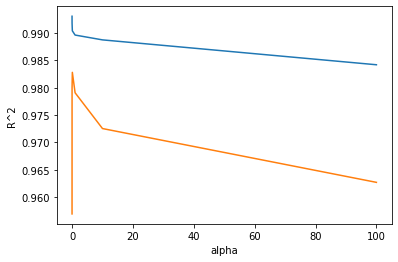

In [ ]:
import matplotlib.pyplot as plt

plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

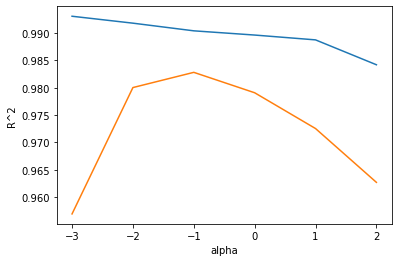

In [ ]:
plt.plot(np.log10(alpha_list), train_score) # 그래프 왼쪽이 너무 촘촘해지므로 로그함수로 바꾸어 지수로 표현
plt.plot(np.log10(alpha_list), test_score)  # 10배씩 늘렸으므로 밑이 10인 로그
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show() # alpha = 0.1 이 goldrocks 지점
           # 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 지점

In [ ]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)

Ridge(alpha=0.1)

In [ ]:
print(ridge.score(train_scaled, train_target)) 

0.9903815817570365


In [ ]:
print(ridge.score(test_scaled, test_target))

0.9827976465386884


In [ ]:
# 라쏘 회귀 : 계수의 절댓값을 기준으로 규제를 적용 (L1 규제)
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

Lasso()

- Lasso 회귀 모델은 최적의 모델을 찾기 위해 좌표축을 따라 최적화를 수행해가는 좌표 하강법(coordinate descent)을 사용

In [ ]:
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [ ]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  lasso = Lasso(alpha = alpha, max_iter = 100000) # 라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산 수행
                                                  # 반복 횟수 부족할 때 warning
                                                  # max_iter 매개변수로 반복 횟수 지정, 기본값은 1000
  lasso.fit(train_scaled, train_target) 
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))  

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.393e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.440e+03, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


### warning이 뜨는 이유
- sklearn의 Lasso 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 반복 횟수가 부족할 때, 이런 경고가 발생

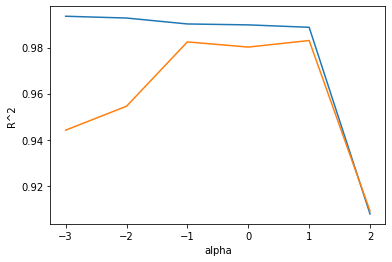

In [ ]:
plt.plot(np.log10(alpha_list), train_score) 
plt.plot(np.log10(alpha_list), test_score)  
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)

Lasso(alpha=10)

In [ ]:
print(lasso.score(train_scaled, train_target))

0.9888067471131867


In [ ]:
print(lasso.score(test_scaled, test_target))

0.9824470598706695


In [ ]:
print(np.sum(lasso.coef_ == 0)) # 55개의 특성 중 40개의 특성을 사용하지 않음

40


- L2규제를 더 선호
- L1규제는 어떤 특성을 사용하지 않을 수도 있음